In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
from fastai.vision import *
from fastai.metrics import AUROC
from fastai.widgets import *

In [14]:
bs=8

In [15]:
path = pathlib.Path(r"F:\Courses\FastAI\v1\Practice\week-1\data")

In [16]:
path

WindowsPath('F:/Courses/FastAI/v1/Practice/week-1/data')

### make the pytorch dataloader using imagebunch 

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3, size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defa

In [18]:
data.classes

['culottes', 'harem_pants', 'palazzo']

### Have a look at the data using show_batch function

C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defa

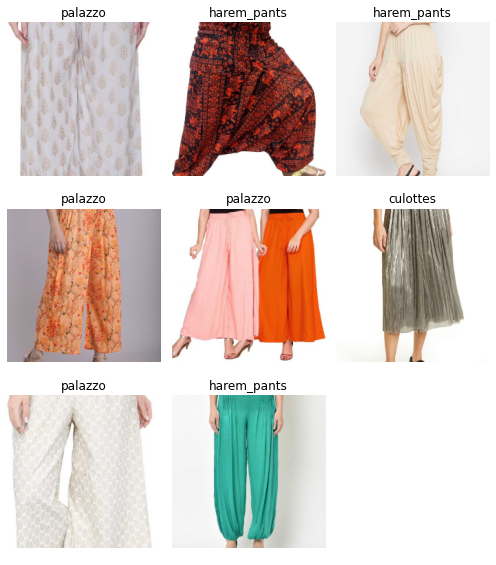

In [19]:
data.show_batch(rows=5, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['culottes', 'harem_pants', 'palazzo'], 3, 21, 9)

## Define the learner

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [22]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.369203,2.156785,0.444444,00:11
1,1.808417,1.136778,0.444444,00:11
2,1.402841,0.893452,0.222222,00:13
3,1.115341,1.167791,0.444444,00:12
4,1.021897,1.539763,0.444444,00:14
5,0.838111,1.579267,0.333333,00:13
6,0.724154,1.635190,0.333333,00:16
7,0.632509,1.683405,0.333333,00:14
8,0.564746,1.594235,0.444444,00:15
9,0.550769,1.482516,0.444444,00:14


In [23]:
learn.save('stage-1')

In [24]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [25]:
interp=ClassificationInterpretation.from_learner(learn)

losses, idx= interp.top_losses()

len(data.valid_ds)==len(losses)==len(idx)

True

C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defa

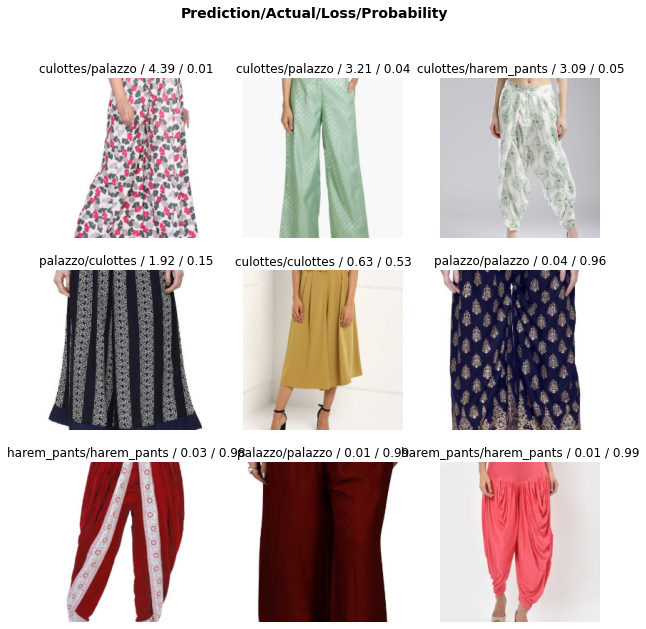

In [26]:
interp.plot_top_losses(9, figsize=(10,10))

In [27]:
doc(interp.plot_top_losses)

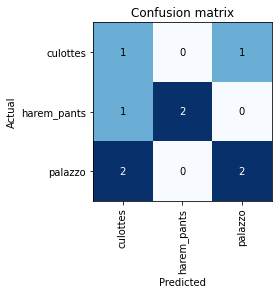

In [28]:
interp.plot_confusion_matrix()

In [29]:
interp.most_confused()

[('palazzo', 'culottes', 2),
 ('culottes', 'palazzo', 1),
 ('harem_pants', 'culottes', 1)]

In [30]:
learn.unfreeze()

In [31]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.507857,1.286750,0.555556,00:15
1,0.475527,1.172338,0.555556,00:15
2,0.408695,1.502413,0.444444,00:15
3,0.357051,2.271796,0.444444,00:14
4,0.369865,1.907630,0.444444,00:20
5,0.332456,0.849330,0.444444,00:18
6,0.485027,0.949521,0.333333,00:14
7,0.418920,1.039949,0.333333,00:15
8,0.415370,1.211985,0.333333,00:17
9,0.366287,0.994542,0.222222,00:15


In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


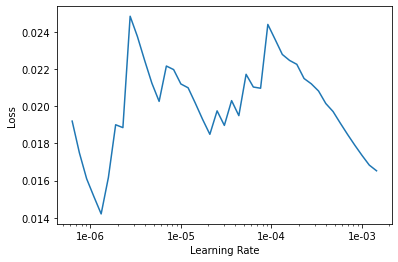

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.000917,0.844052,0.222222,00:14
1,0.004873,0.814161,0.222222,00:14
2,0.185921,0.798732,0.222222,00:15
3,0.140815,0.873999,0.333333,00:14
4,0.121980,0.941114,0.333333,00:16
5,0.100246,0.824473,0.222222,00:14
6,0.084526,0.834299,0.222222,00:13
7,0.072850,0.824920,0.222222,00:14
8,0.063714,0.845461,0.222222,00:14
9,0.083652,0.896737,0.222222,00:13


In [35]:
learn.save("stage-2")

In [36]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

You can deactivate this warning by passing `no_check=True`.


C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The defa

In [37]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [38]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [39]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


In [40]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [41]:
learn.export()

In [42]:
defaults.device = torch.device('cpu')

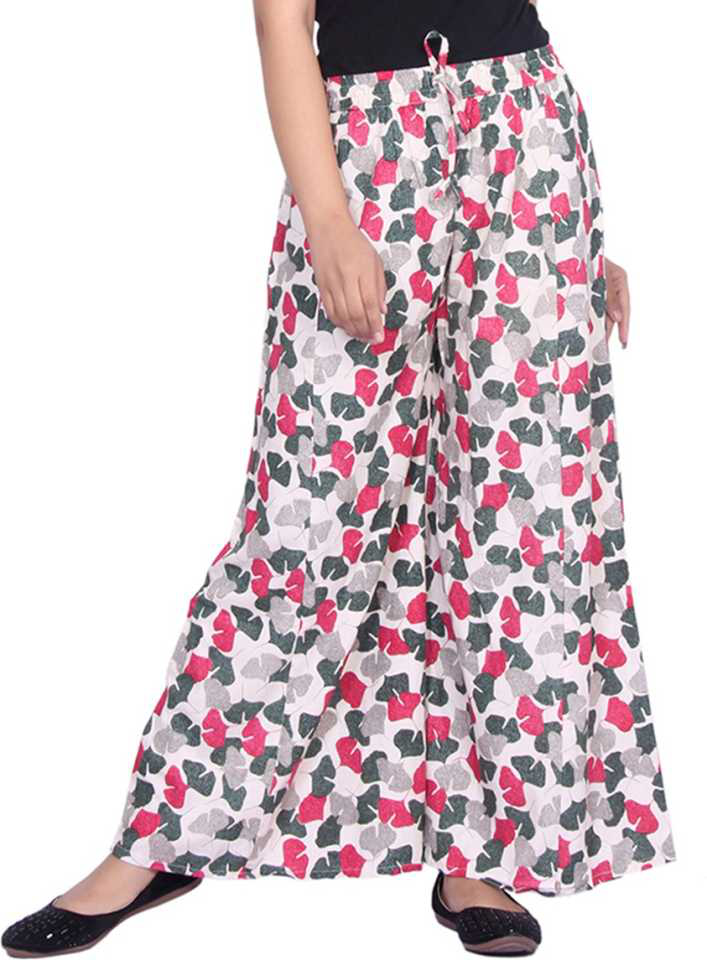

In [43]:
img = open_image(path/'palazzo'/'8.jpeg')
img

In [44]:
learn=load_learner(path)

In [67]:
op=learn.predict(img)
classes=learn.data.classes

C:\Users\Asus\Anaconda3\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [82]:
predicted_class=classes[op[1].item()]
predicted_class

'palazzo'